# Indeed.com Job Analysis - Python 3.5

<img src="./image/indeed_data_scientist_keyword.png" width="300px" align="left">      

      
### Tutorial  
* Web Scraping Indeed for Key Data Science Job Skills [link](https://jessesw.com/Data-Science-Skills/)
* Percent-Encoding Reserved Characters [link](https://en.wikipedia.org/wiki/Percent-encoding) 

### Libraries
* This tutorial requires a few python libraries
  * BeautifulSoup4
  * NLTK [[guide]](http://www.nltk.org/install.html)
  * Download NLTK data [[guide]](http://www.nltk.org/data.html)
  * urllib2 or urllib3   
  
> ```pip install beautifulsoup4
pip install -U nltk```

In [3]:
# import libraries

from bs4 import BeautifulSoup # For HTML parsing
import urllib # Website connections
import re # Regular expressions
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
from nltk.corpus import stopwords # Filter out stopwords, such as 'the', 'or', 'and'
import pandas as pd # For converting results to a dataframe and bar chart plots
%matplotlib inline


In [33]:
s = 'This is some \\u03c0 text that has to be cleaned\\u2026! it\\u0027s annoying!'

In [46]:
bytes(s, "utf-8").decode("unicode_escape")

LookupError: unknown encoding: string-escape

In [41]:
print(s.encode('string-escape'))

LookupError: unknown encoding: string-escape

## 1 - Scrape a web page with BeautifulSoup

#### Download a web page

In [6]:
link = 'http://www.michaelpage.ca/job-detail/data-scientist/ref/1187018?source=search'
link_html  = urllib.request.urlopen(urllib.request.Request(link)).read()

#### Parse the HTML source and build a soup object

In [9]:
soup_obj = BeautifulSoup(link_html, 'html.parser')

In [10]:
print(soup_obj)

<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="//plus.google.com/101381678598528396017" rel="publisher"/>
<link href="http://www.michaelpage.ca/profiles/mp_singapore/themes/mp_nextgen/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<meta content="The types of projects data scientists are responsible for include the following:
Using machine learning and other data mining techniques to get insi

#### Remove noisy tags such as style and script

In [11]:
help(soup_obj)

Help on BeautifulSoup in module bs4 object:

class BeautifulSoup(bs4.element.Tag)
 |  This class defines the basic interface called by the tree builders.
 |  
 |  These methods will be called by the parser:
 |    reset()
 |    feed(markup)
 |  
 |  The tree builder may call these methods from its feed() implementation:
 |    handle_starttag(name, attrs) # See note about return value
 |    handle_endtag(name)
 |    handle_data(data) # Appends to the current data node
 |    endData(containerClass=NavigableString) # Ends the current data node
 |  
 |  No matter how complicated the underlying parser is, you should be
 |  able to build a tree using 'start tag' events, 'end tag' events,
 |  'data' events, and "done with data" events.
 |  
 |  If you encounter an empty-element tag (aka a self-closing tag,
 |  like HTML's <br> tag), call handle_starttag and then
 |  handle_endtag.
 |  
 |  Method resolution order:
 |      BeautifulSoup
 |      bs4.element.Tag
 |      bs4.element.PageElement
 |

In [12]:
len(soup_obj(["script", "style"]))

18

In [14]:
"""
PageElement.extract() removes a tag or string from the tree. 
It returns the tag or string that was extracted:
"""

for script in soup_obj(["script", "style"]):
    print(type(script))
    script.extract()
    

<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>


## 2 - Text Cleaning

#### Extract text from the soup object

In [27]:
text = soup_obj.get_text()

In [28]:
text.splitlines()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Data Scientist - 1187018 | Michael Page CA',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 'Save Jobs\xa0(0) ',
 '',
 '',
 'Main menu',
 'Home',
 'Jobs+',
 '',
 '',
 '',
 '',
 '',
 'Searching for a job?',
 '',
 'Searching for a job?',
 'Job search',
 'Submit your resume',
 'Salary center',
 ' ',
 ' ',
 '',
 '',
 '',
 '',
 'Job search advice',
 '',
 'Job search advice',
 'Cover Letter and Resume Advice',
 'Job Interview Tips',
 'Growing Your Career',
 ' ',
 ' ',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '      Search for jobs    ',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '0',
 '50k',
 '100k',
 '150k',
 '200k',
 '250k',
 '300k',
 '350k',
 '400k',
 '450k',
 '500k+',
 '',
 '',
 '',
 '',
 '',
 '',
 '0',

In [29]:
lines = (line.strip() for line in text.splitlines()) # break into lines
type(lines)

generator

In [30]:
chunks = (phrase.strip() for line in lines for phrase in line.split("  ")) # break multi-headlines into a line each
type(chunks)

generator

In [31]:
def chunk_space(chunk):
    chunk_out = chunk + ' ' # Need to fix spacing issue
    return chunk_out  

text = ''.join(chunk_space(chunk) for chunk in chunks if chunk) # Get rid of all blank lines and ends of line


In [32]:
text

"Data Scientist - 1187018 | Michael Page CA Save Jobs\xa0(0) Main menu Home Jobs+ Searching for a job? Searching for a job? Job search Submit your resume Salary center Job search advice Job search advice Cover Letter and Resume Advice Job Interview Tips Growing Your Career Search for jobs 0 50k 100k 150k 200k 250k 300k 350k 400k 450k 500k+ 0 50k 100k 150k 200k 250k 300k 350k 400k 450k 500k+ Recruiting+ Looking to hire? Looking to hire? The Recruitment Process Reasons to Partner With Michael Page Our Sourcing Methodology Client Testimonials Recruitment expertise Recruitment expertise Advisory Banking & Financial Services Engineering & Manufacturing Finance & Accounting Digital & E-Commerce Human Resources Information Technology Interim Oil & Gas Procurement & Supply Chain Real Estate & Construction Sales & Marketing Healthcare & Life Sciences Advice+ Career advice Career advice Job Search Advice Cover Letter and Resume Advice Job Interview Tips Growing Your Career Refer a Friend and Win

In [202]:
text

'Position is now filled | Michael Page CA Save Jobs\xc2\xa0(0) Main menu Home Jobs+ Searching for a job? Searching for a job? Job search Submit your resume Salary center Job search advice Job search advice Cover Letter and Resume Advice Job Interview Tips Growing Your Career Search for jobs 0 50k 100k 150k 200k 250k 300k 350k 400k 450k 500k+ 0 50k 100k 150k 200k 250k 300k 350k 400k 450k 500k+ Recruiting+ Looking to hire? Looking to hire? The Recruitment Process Reasons to Partner With Michael Page Our Sourcing Methodology Client Testimonials Recruitment expertise Recruitment expertise Advisory Banking & Financial Services Engineering & Manufacturing Finance & Accounting Digital & E-Commerce Human Resources Information Technology Interim Oil & Gas Procurement & Supply Chain Real Estate & Construction Sales & Marketing Healthcare & Life Sciences Advice+ Career advice Career advice Job Search Advice Cover Letter and Resume Advice Job Interview Tips Growing Your Career Refer a Friend and W

In [47]:
# text = text.decode('unicode_escape').encode('ascii', 'ignore') # Need this as some websites aren't formatted in a way that this works, can occasionally throw

text = bytes(text, "utf-8").decode("unicode_escape")


In [50]:
print(text)

Data Scientist - 1187018 | Michael Page CA Save JobsÂ (0) Main menu Home Jobs+ Searching for a job? Searching for a job? Job search Submit your resume Salary center Job search advice Job search advice Cover Letter and Resume Advice Job Interview Tips Growing Your Career Search for jobs 0 50k 100k 150k 200k 250k 300k 350k 400k 450k 500k+ 0 50k 100k 150k 200k 250k 300k 350k 400k 450k 500k+ Recruiting+ Looking to hire? Looking to hire? The Recruitment Process Reasons to Partner With Michael Page Our Sourcing Methodology Client Testimonials Recruitment expertise Recruitment expertise Advisory Banking & Financial Services Engineering & Manufacturing Finance & Accounting Digital & E-Commerce Human Resources Information Technology Interim Oil & Gas Procurement & Supply Chain Real Estate & Construction Sales & Marketing Healthcare & Life Sciences Advice+ Career advice Career advice Job Search Advice Cover Letter and Resume Advice Job Interview Tips Growing Your Career Refer a Friend and Win Ma

In [51]:
text = re.sub("[^a-zA-Z.+3]"," ", text)  # Now get rid of any terms that aren't words (include 3 for d3.js)
text = text.lower().split()  # Go to lower case and split them apart

In [52]:
text

['data',
 'scientist',
 'michael',
 'page',
 'ca',
 'save',
 'jobs',
 'main',
 'menu',
 'home',
 'jobs+',
 'searching',
 'for',
 'a',
 'job',
 'searching',
 'for',
 'a',
 'job',
 'job',
 'search',
 'submit',
 'your',
 'resume',
 'salary',
 'center',
 'job',
 'search',
 'advice',
 'job',
 'search',
 'advice',
 'cover',
 'letter',
 'and',
 'resume',
 'advice',
 'job',
 'interview',
 'tips',
 'growing',
 'your',
 'career',
 'search',
 'for',
 'jobs',
 'k',
 'k',
 'k',
 'k',
 'k',
 '3',
 'k',
 '3',
 'k',
 'k',
 'k',
 'k+',
 'k',
 'k',
 'k',
 'k',
 'k',
 '3',
 'k',
 '3',
 'k',
 'k',
 'k',
 'k+',
 'recruiting+',
 'looking',
 'to',
 'hire',
 'looking',
 'to',
 'hire',
 'the',
 'recruitment',
 'process',
 'reasons',
 'to',
 'partner',
 'with',
 'michael',
 'page',
 'our',
 'sourcing',
 'methodology',
 'client',
 'testimonials',
 'recruitment',
 'expertise',
 'recruitment',
 'expertise',
 'advisory',
 'banking',
 'financial',
 'services',
 'engineering',
 'manufacturing',
 'finance',
 'accounti

In [180]:
stop_words = set(stopwords.words("english")) # Filter out any stop words
text = [w for w in text if not w in stop_words]
text = list(set(text)) # Last, just get the set of these. Ignore counts (we are just looking at whether a term existed
                        # or not on the website)

In [181]:
text

['www.googletagmanager.com',
 'advisory',
 'feedback',
 'chain',
 'interim',
 'human',
 'find',
 'retention',
 'site',
 'rd',
 'style',
 'terms',
 'menu',
 'gtm',
 'employer',
 'attraction',
 'choose',
 'policy',
 'suite',
 'hidden',
 'main',
 'resources',
 'real',
 'finance',
 'advice+',
 'none',
 'about+',
 'height',
 'articles',
 'h',
 'michael',
 'upload',
 'jobs+',
 'teams',
 'banking',
 'continue',
 'offices',
 'popular',
 'searchread',
 'available.',
 'page',
 'financial',
 'google+suivez',
 'searching',
 'sign',
 'recruitment',
 'growth',
 'home',
 'canada',
 '3p',
 'brief',
 'looking',
 '3',
 'herehome',
 'run',
 'sur',
 'testimonials',
 'international',
 'tips',
 'principal',
 'induction',
 'filled',
 'refer',
 'jobs',
 'business',
 'resume',
 'marketing',
 'job',
 'ontario',
 'manufacturing',
 'suivez',
 'src',
 'search',
 'language',
 'career',
 'country',
 'k',
 'recruiting+',
 'linkedinsuivez',
 'accessibility',
 'portal',
 'options',
 'contact+',
 'useful',
 'supply',
 '

## 3 - Parsing Indeed.com Job Search Result Page

#### Build search criteria

In [182]:
city='Hamilton'
state='ON'
job_title = 'data+scientist' # searching for data scientist exact fit("data scientist" on Indeed search)

base_url = 'http://ca.indeed.com'

# Make sure the city specified works properly if it has more than one word (such as San Francisco)
# "San Francisco" is one word so the space between needs special care
# In a URL there cannot be any space. We use percent-encoding %2C as space
if city is not None:
    final_city = city.split() 
    final_city = '+'.join(word for word in final_city)
    final_site_list = ['http://ca.indeed.com/jobs?q=%22', job_title, '%22&l=', final_city,
                    '%2C+', state] # Join all of our strings together so that indeed will search correctly
else:
    final_site_list = ['http://ca.indeed.com/jobs?q="', job_title, '"']

    
final_site = ''.join(final_site_list)

print("----- Print the URL component as list -----")
print(final_site_list)
print("")
print("----- Print the final concatenated URL -----")
print(final_site)


----- Print the URL component as list -----
['http://ca.indeed.com/jobs?q=%22', 'data+scientist', '%22&l=', 'Hamilton', '%2C+', 'ON']

----- Print the final concatenated URL -----
http://ca.indeed.com/jobs?q=%22data+scientist%22&l=Hamilton%2C+ON


#### Download and parse the page


In [ ]:
soup

In [185]:
# read the URL content
html = urllib.urlopen(final_site).read() # Open up the front page of our search first

# create a beautifulsoup object
soup = BeautifulSoup(html, 'html5lib') # Get the html from the first page

print soup

<!DOCTYPE html>
<html lang="en"><head>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<!-- pll --><script src="/s/9eea320/en_CA.js" type="text/javascript"></script>
<link href="/s/bfd4a87/jobsearch_all.css" rel="stylesheet" type="text/css"/>
<link href="http://ca.indeed.com/rss?q=%22data+scientist%22&amp;l=Hamilton%2C+ON" rel="alternate" title="Data Scientist Jobs in Hamilton, ON" type="application/rss+xml"/>
<link href="/m/jobs?q=%22data+scientist%22&amp;l=Hamilton%2C+ON" media="handheld" rel="alternate"/>
<script type="text/javascript">
    
    if (typeof window['closureReadyCallbacks'] == 'undefined') {
        window['closureReadyCallbacks'] = [];
    }

    function call_when_jsall_loaded(cb) {
        if (window['closureReady']) {
            cb();
        } else {
            window['closureReadyCallbacks'].push(cb);
        }
    }
</script>
<script src="/s/71ea1e0/jobsearch-all-compiled.js" type="text/javascript"></script>
            <script type="text/j

In [187]:
# extract url links
job_link_area = soup.find(id = 'resultsCol') # The center column on the page where the job postings exist
print job_link_area

<td id="resultsCol">
<div class="messageContainer">

<script type="text/javascript">
function setJaPromoCookie() {
var expires = new Date();
expires.setTime(expires.getTime() + (5 * 365 * 24 * 60 * 60 * 1000));
setCookie("showJaPromo", "1", expires);
}
function setRefineByCookie(refineByTypes) {
var expires = new Date();
expires.setTime(expires.getTime() + (10 * 1000));
for (var i = 0; i < refineByTypes.length; i++) {
setCookie(refineByTypes[i], "1", expires);
}
}
</script>

</div>

<style type="text/css">
#increased_radius_result {
font-size: 16px;
font-style: italic;
}
#original_radius_result{
font-size: 13px;
font-style: italic;
color: #666666;
}
</style>
<div class="resultsTop"><div id="searchCount">Jobs 1 to 9 of 11</div>
<div data-tn-section="resumePromo" id="resumePromo">
<a aria-hidden="true" href="/promo/resume" onclick="this.href = appendParamsOnce( this.href, '?from=serptop3&amp;subfrom=resprmrtop&amp;trk.origin=jobsearch&amp;trk.variant=resprmrtop&amp;trk.tk=1bhas1mof0k0547

In [215]:
job_URLS = [str(base_url) + str(link.get('href')) for link in job_link_area.find_all('a')] # Get the URLS for the jobs
job_URLS = filter(lambda x: 'clk' in x and 'pagead' not in x, job_URLS)

job_URLS

['http://ca.indeed.com/rc/clk?jk=d7f74a68abe50092&fccid=31261f7c970b2e00',
 'http://ca.indeed.com/rc/clk?jk=f37519bd8c4033b2&fccid=617d7f961cfcf54a',
 'http://ca.indeed.com/rc/clk?jk=97540dda80fa7f04&fccid=f3e403e0f1d59b84',
 'http://ca.indeed.com/rc/clk?jk=26c69085ff80e483&fccid=9343039b36601ad2',
 'http://ca.indeed.com/rc/clk?jk=fcf4ab6ae076b2b8&fccid=9ef8c0dc355e8022']

## Indeed Job Scraping Program 

In [ ]:
# function to cleanup text
def text_cleaner(website):
    '''
    This function just cleans up the raw html so that I can look at it.
    Inputs: a URL to investigate
    Outputs: Cleaned text only
    '''
    try:
        site = urllib.urlopen(website).read() # Connect to the job posting
    except: 
        return   # Need this in case the website isn't there anymore or some other weird connection problem 

    soup_obj = BeautifulSoup(site, 'html5lib') # Get the html from the site

    for script in soup_obj(["script", "style"]):
        script.extract() # Remove these two elements from the BS4 object

    text = soup_obj.get_text() # Get the text from this
    lines = (line.strip() for line in text.splitlines()) # break into lines
    chunks = (phrase.strip() for line in lines for phrase in line.split("  ")) # break multi-headlines into a line each

    def chunk_space(chunk):
        chunk_out = chunk + ' ' # Need to fix spacing issue
        return chunk_out  

    text = ''.join(chunk_space(chunk) for chunk in chunks if chunk).encode('utf-8') # Get rid of all blank lines and ends of line

    # Now clean out all of the unicode junk (this line works great!!!)
    try:
        text = text.decode('unicode_escape').encode('ascii', 'ignore') # Need this as some websites aren't formatted
    except:                                                            # in a way that this works, can occasionally throw
        return                                                         # an exception

    text = re.sub("[^a-zA-Z.+3]"," ", text)  # Now get rid of any terms that aren't words (include 3 for d3.js)
                                                # Also include + for C++

    text = text.lower().split()  # Go to lower case and split them apart
    stop_words = set(stopwords.words("english")) # Filter out any stop words
    text = [w for w in text if not w in stop_words]
    text = list(set(text)) # Last, just get the set of these. Ignore counts (we are just looking at whether a term existed
                            # or not on the website)
    return text

# note the function itself doesn't return anything if you run this cell





# The skills_info function prints out a list of skillset keywords ordered by popularity
def skills_info(city = None, state = None, job_title = None):
    '''
    This function will take a desired city/state and look for all new job postings
    on Indeed.com. It will crawl all of the job postings and keep track of how many
    use a preset list of typical data science skills. The final percentage for each skill
    is then displayed at the end of the collation. 

    Inputs: The location's city and state. These are optional. If no city/state is input, 
    the function will assume a national search (this can take a while!!!).
    Input the city/state as strings, such as skills_info('Chicago', 'IL').
    Use a two letter abbreviation for the state.

    Output: A bar chart showing the most commonly desired skills in the job market for 
    a data scientist. 
    '''

    #final_job = 'data+scientist' # searching for data scientist exact fit("data scientist" on Indeed search)

    final_job = str(job_title)
    
    # Make sure the city specified works properly if it has more than one word (such as San Francisco)
    if city is not None:
        final_city = city.split() 
        final_city = '+'.join(word for word in final_city)
        final_site_list = ['http://ca.indeed.com/jobs?q=', final_job, '&l=', final_city,
                    '%2C+', state] # Join all of our strings together so that indeed will search correctly
    else:
        final_site_list = ['http://ca.indeed.com/jobs?q="', final_job, '"']

    final_site = ''.join(final_site_list) # Merge the html address together into one string
    print(final_site)

    base_url = 'http://ca.indeed.com'


    try:
        html = urllib.urlopen(final_site).read() # Open up the front page of our search first
    except:
        'That city/state combination did not have any jobs. Exiting . . .' # In case the city is invalid
        return
    soup = BeautifulSoup(html, 'lxml') # Get the html from the first page

    # Now find out how many jobs there were

    num_jobs_area = soup.find(id = 'searchCount').string.encode('utf-8') # Now extract the total number of jobs found
                                                                        # The 'searchCount' object has this

    job_numbers = re.findall('\d+', num_jobs_area) # Extract the total jobs found from the search result


    if len(job_numbers) > 3: # Have a total number of jobs greater than 1000
        total_num_jobs = (int(job_numbers[2])*1000) + int(job_numbers[3])
    else:
        total_num_jobs = int(job_numbers[2]) 

    city_title = city
    if city is None:
        city_title = 'Nationwide'

    print('There were', total_num_jobs, 'jobs found,', city_title) # Display how many jobs were found

    num_pages = total_num_jobs/10 # This will be how we know the number of times we need to iterate over each new
                                      # search result page
    job_descriptions = [] # Store all our descriptions in this list

    for i in xrange(1,min(num_pages+1,999)): # Loop through all of our search result pages
        print('Getting page', i)
        start_num = str(i*10) # Assign the multiplier of 10 to view the pages we want
        current_page = ''.join([final_site, '&start=', start_num])
        # Now that we can view the correct 10 job returns, start collecting the text samples from each

        html_page = urllib.urlopen(current_page).read() # Get the page

        page_obj = BeautifulSoup(html_page) # Locate all of the job links
        job_link_area = page_obj.find(id = 'resultsCol') # The center column on the page where the job postings exist

        job_URLS = [str(base_url) + str(link.get('href')) for link in job_link_area.find_all('a')] # Get the URLS for the jobs

        job_URLS = filter(lambda x:'clk' in x, job_URLS) # Now get just the job related URLS


        for j in xrange(0,len(job_URLS)):
            final_description = text_cleaner(job_URLS[j])
            if final_description: # So that we only append when the website was accessed correctly
                job_descriptions.append(final_description)
            sleep(1) # So that we don't be jerks. If you have a very fast internet connection you could hit the server a lot! 

    print('Done with collecting the job postings!')    
    print('There were' + str(len(job_descriptions)) + 'jobs successfully found.')


    doc_frequency = Counter() # This will create a full counter of our terms. 
    [doc_frequency.update(item) for item in job_descriptions] # List comp

    # Now we can just look at our final dict list inside doc_frequency

    # Obtain our key terms and store them in a dict. These are the key data science skills we are looking for

    prog_lang_dict = Counter({'R':doc_frequency['r'], 'Python':doc_frequency['python'],
                    'Java':doc_frequency['java'], 'C++':doc_frequency['c++'],
                    'Ruby':doc_frequency['ruby'],
                    'Perl':doc_frequency['perl'], 'Matlab':doc_frequency['matlab'],
                    'JavaScript':doc_frequency['javascript'], 'Scala': doc_frequency['scala']})

    analysis_tool_dict = Counter({'Excel':doc_frequency['excel'],  'Tableau':doc_frequency['tableau'],
                        'D3.js':doc_frequency['d3.js'], 'SAS':doc_frequency['sas'],
                        'SPSS':doc_frequency['spss'], 'D3':doc_frequency['d3']})  

    hadoop_dict = Counter({'Hadoop':doc_frequency['hadoop'], 'MapReduce':doc_frequency['mapreduce'],
                'Spark':doc_frequency['spark'], 'Pig':doc_frequency['pig'],
                'Hive':doc_frequency['hive'], 'Shark':doc_frequency['shark'],
                'Oozie':doc_frequency['oozie'], 'ZooKeeper':doc_frequency['zookeeper'],
                'Flume':doc_frequency['flume'], 'Mahout':doc_frequency['mahout']})

    database_dict = Counter({'SQL':doc_frequency['sql'], 'NoSQL':doc_frequency['nosql'],
                    'HBase':doc_frequency['hbase'], 'Cassandra':doc_frequency['cassandra'],
                    'MongoDB':doc_frequency['mongodb']})


    overall_total_skills = prog_lang_dict + analysis_tool_dict + hadoop_dict + database_dict # Combine our Counter objects



    final_frame = pd.DataFrame(overall_total_skills.items(), columns = ['Term', 'NumPostings']) # Convert these terms to a 
                                                                                                # dataframe 

    # Change the values to reflect a percentage of the postings 

    final_frame.NumPostings = (final_frame.NumPostings)*100/len(job_descriptions) # Gives percentage of job postings 
                                                                                    #  having that term 

    # Sort the data for plotting purposes

    final_frame.sort_values(by = 'NumPostings', ascending = False, inplace = True)

    # Get it ready for a bar plot

    final_plot = final_frame.plot(x = 'Term', kind = 'bar', legend = None, 
                            title = 'Percentage of Data Scientist Job Ads on Indeed, ' + city_title)

    final_plot.set_ylabel('Percentage Appearing in Job Ads')
    fig = final_plot.get_figure() # Have to convert the pandas plot object to a matplotlib object


    return fig, final_frame # End of the function

http://ca.indeed.com/jobs?q=Data+Scientist&l=Toronto%2C+ON
('There were', 341, 'jobs found,', 'Toronto')
('Getting page', 1)
('Getting page', 2)
('Getting page', 3)
('Getting page', 4)
('Getting page', 5)
('Getting page', 6)
('Getting page', 7)
('Getting page', 8)
('Getting page', 9)
('Getting page', 10)
('Getting page', 11)
('Getting page', 12)
('Getting page', 13)
('Getting page', 14)
('Getting page', 15)
('Getting page', 16)
('Getting page', 17)
('Getting page', 18)
('Getting page', 19)
('Getting page', 20)
('Getting page', 21)
('Getting page', 22)
('Getting page', 23)
('Getting page', 24)
('Getting page', 25)
('Getting page', 26)
('Getting page', 27)
('Getting page', 28)
('Getting page', 29)
('Getting page', 30)
('Getting page', 31)
('Getting page', 32)
('Getting page', 33)
('Getting page', 34)
Done with collecting the job postings!
There were255jobs successfully found.


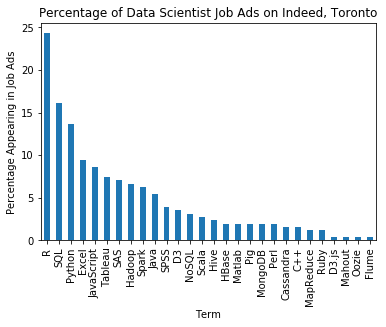

In [226]:
# Data Scientist job keywords in Mississauga
toronto_data_scientist = skills_info(city = 'Toronto', state = 'ON', job_title='Data+Scientist') 

In [ ]:
# Data Engineer job keywords in Mississauga
toronto_data_analyst = skills_info(city = 'Toronto', state = 'ON', job_title='Data+Analyst') 

In [4]:
# Data Engineer job keywords in Mississauga
toronto_data_engineer = skills_info(city = 'Toronto', state = 'ON', job_title='Data+Engineer') 

http://ca.indeed.com/jobs?q=Data+Engineer&l=Toronto%2C+ON
('There were', 1641, 'jobs found,', 'Toronto')
('Getting page', 1)
('Getting page', 2)
('Getting page', 3)
('Getting page', 4)
('Getting page', 5)
('Getting page', 6)
('Getting page', 7)
('Getting page', 8)
('Getting page', 9)
('Getting page', 10)
('Getting page', 11)
('Getting page', 12)
('Getting page', 13)
('Getting page', 14)
('Getting page', 15)
('Getting page', 16)
('Getting page', 17)
('Getting page', 18)
('Getting page', 19)
('Getting page', 20)
('Getting page', 21)
('Getting page', 22)
('Getting page', 23)
('Getting page', 24)
('Getting page', 25)
('Getting page', 26)
('Getting page', 27)
('Getting page', 28)
('Getting page', 29)
('Getting page', 30)
('Getting page', 31)
('Getting page', 32)
('Getting page', 33)
('Getting page', 34)
('Getting page', 35)
('Getting page', 36)
('Getting page', 37)
('Getting page', 38)
('Getting page', 39)
('Getting page', 40)
('Getting page', 41)
('Getting page', 42)
('Getting page', 43)
(

IOError: [Errno socket error] [Errno 60] Operation timed out

In [ ]:
# Data Engineer job keywords in Mississauga
toronto_business_anaylst = skills_info(city = 'Toronto', state = 'ON', job_title='Business+Analyst') 